In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = rf"miku.jpg"

# Read the image
raw_image = cv2.imread(image_path)

In [ ]:
# Line



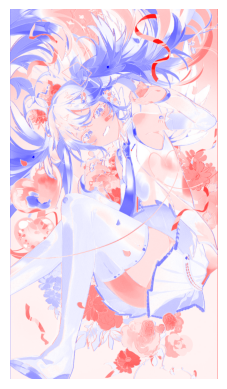

True

In [ ]:
#Temperature analysis

# Convert BGR to RGB (since OpenCV loads images in BGR format)
image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

# Extract Red and Blue channels
red_channel = image[:, :, 0].astype(np.int16)
blue_channel = image[:, :, 2].astype(np.int16)

# Compute difference (R - B)
diff = red_channel - blue_channel

# Normalize values to fit in range [-255, 255]
diff_normalized = np.clip(diff, -255, 255)

# Create colored image
colorized_image = np.zeros_like(image)
colorized_image[:, :, 0] = np.clip(diff_normalized + 255, 0, 255).astype(np.uint8)  # Blue
colorized_image[:, :, 1] = np.clip(255 - abs(diff_normalized), 0, 255).astype(np.uint8)  # White transition
colorized_image[:, :, 2] = np.clip(-diff_normalized + 255, 0, 255).astype(np.uint8)  # Red

# Display image in notebook
plt.imshow(colorized_image)
plt.axis("off")  # Hide axis
plt.show()

cv2.imwrite("temperature_analysis.png", cv2.cvtColor(colorized_image, cv2.COLOR_RGB2BGR))